In [1]:
import numpy as np   # Some basic libraries
import pandas as pd
import matplotlib.pyplot as plt  #A visvualization library
from sklearn.neural_network import MLPRegressor  #Importing MLP from sklearn
from math import sqrt                      #Some libraries for error calculation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split  #Split the data set
from sklearn import preprocessing  #preprocessing library0
import seaborn as sns                # these library for visualization 

In [2]:
#Data load with help of pandas
df1 = pd.read_excel (r"D:\E-LEARNING\Technical\IITD - DSML\Class\Project details\Problem 1\Dataset 1 - Copy.xlsx")
df1.head()  #visualize the fisrt 5 samples

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,cluster
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,3
2,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,1
3,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,NEAR BAY,1
4,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,NEAR BAY,1


In [3]:
print('Name of columns', df1.columns,'\nShape of data', np.shape(df1))

Name of columns Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'cluster'],
      dtype='object') 
Shape of data (18565, 11)


In [4]:
df = pd.get_dummies(df1, columns = ['ocean_proximity', 'cluster'])
df.head() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,False,False,False,True,False,True,False,False,False,False
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,False,False,False,True,False,False,False,False,True,False
2,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,False,False,False,True,False,False,True,False,False,False
3,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,False,False,False,True,False,False,True,False,False,False
4,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,False,False,False,True,False,False,True,False,False,False


In [5]:
#A brief statistical details
df.describe()
df.info()  # basic information of data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18565 entries, 0 to 18564
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   18565 non-null  float64
 1   latitude                    18565 non-null  float64
 2   housing_median_age          18565 non-null  int64  
 3   total_rooms                 18565 non-null  int64  
 4   total_bedrooms              18376 non-null  float64
 5   population                  18565 non-null  int64  
 6   households                  18565 non-null  int64  
 7   median_income               18565 non-null  float64
 8   median_house_value          18565 non-null  int64  
 9   ocean_proximity_<1H OCEAN   18565 non-null  bool   
 10  ocean_proximity_INLAND      18565 non-null  bool   
 11  ocean_proximity_ISLAND      18565 non-null  bool   
 12  ocean_proximity_NEAR BAY    18565 non-null  bool   
 13  ocean_proximity_NEAR OCEAN  185

<Axes: >

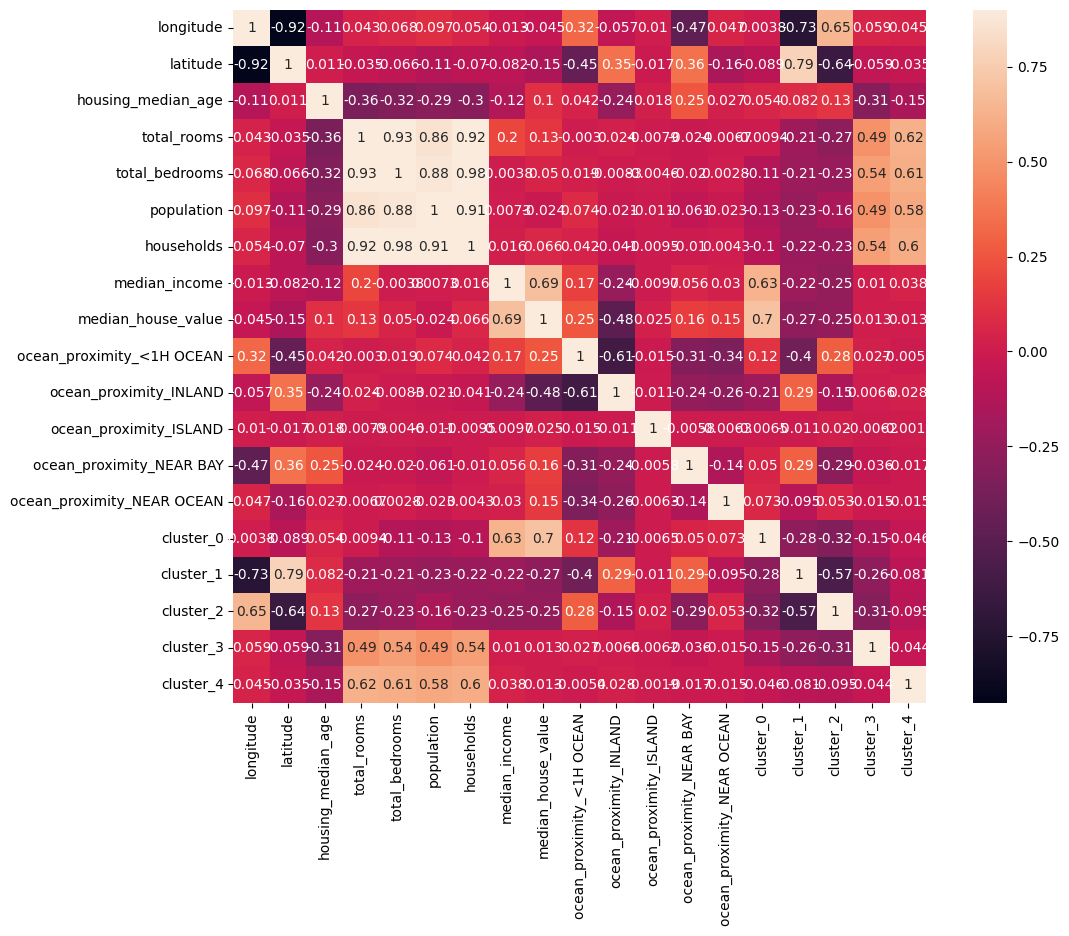

In [6]:
#correlation matrix of all variable, heat plot of of matrix is shown
corrmat = df.corr()                          
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, annot=True, vmax=0.9, square=True)

<Axes: >

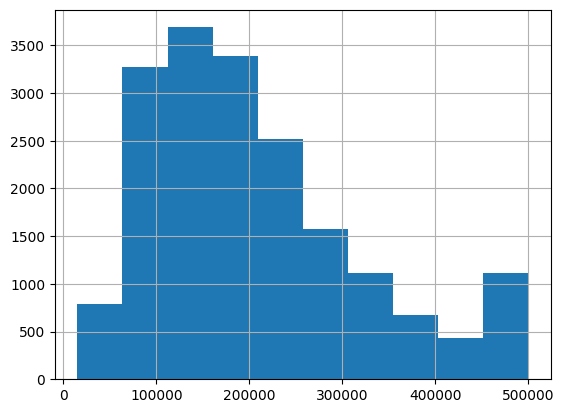

In [7]:
df['median_house_value'].hist()

<Axes: xlabel='longitude', ylabel='latitude'>

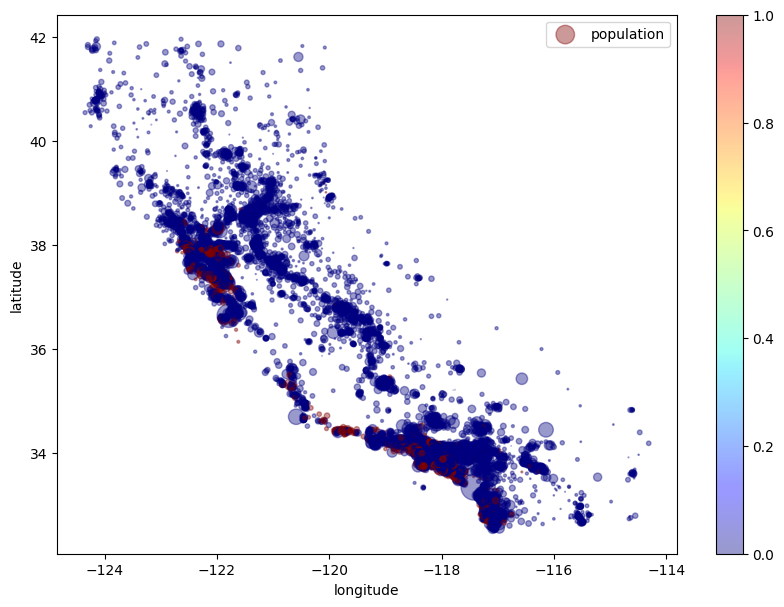

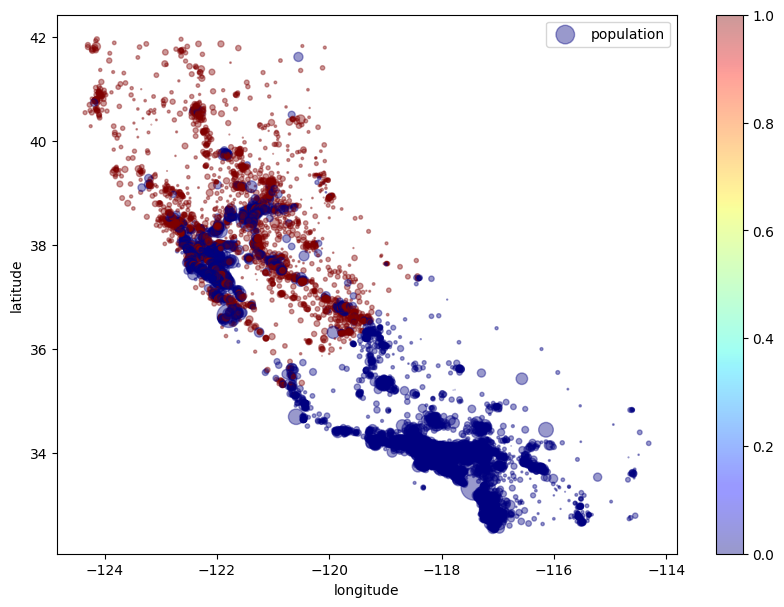

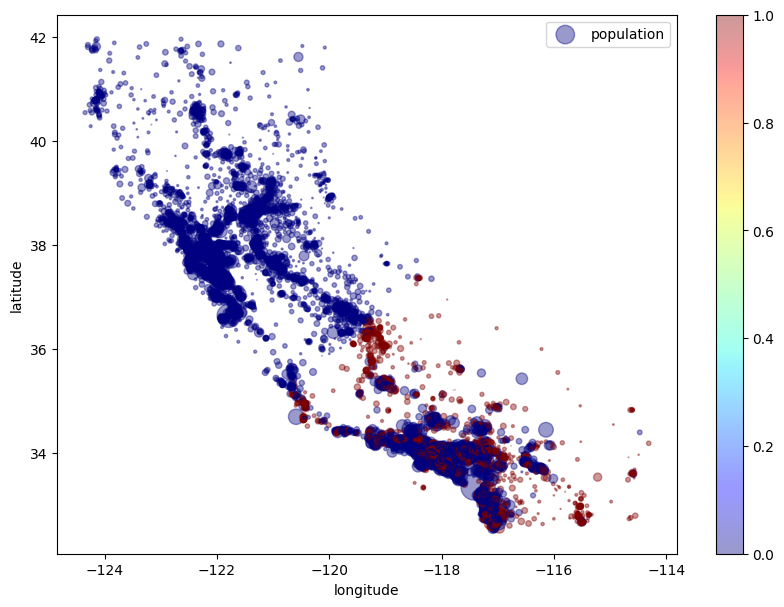

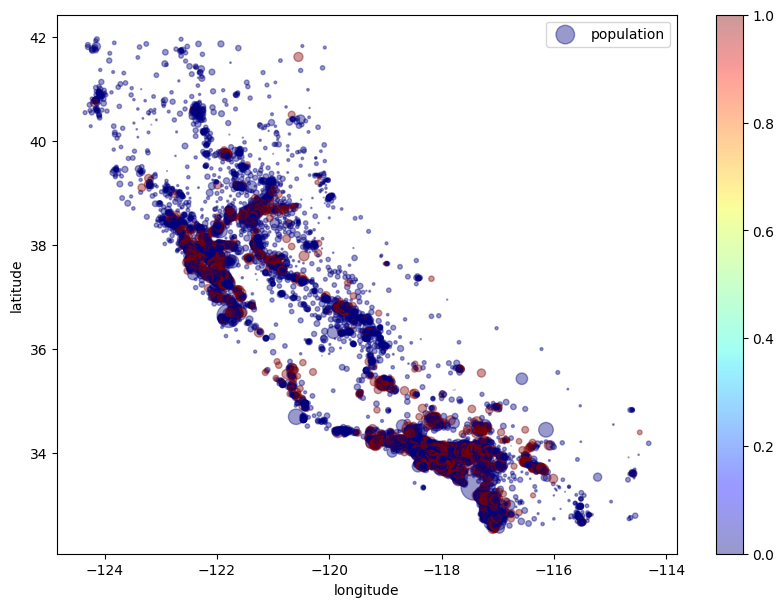

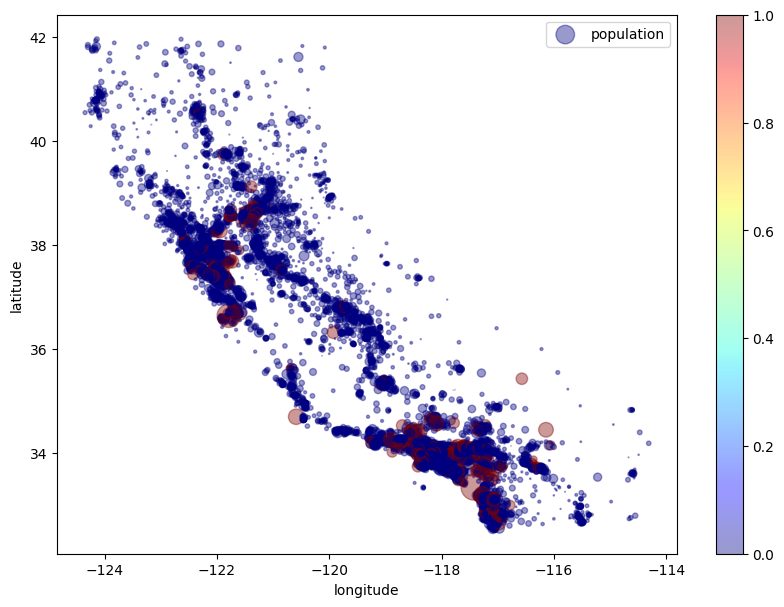

In [8]:
# option s: radius of each circle represent the population/100
# option c: color represents the median price
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, 
    s=df['population']/100, label='population', figsize=(10,7), 
    c=df['cluster_0'],cmap=plt.get_cmap('jet'), colorbar=True)
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, 
    s=df['population']/100, label='population', figsize=(10,7), 
    c=df['cluster_1'],cmap=plt.get_cmap('jet'), colorbar=True)
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, 
    s=df['population']/100, label='population', figsize=(10,7), 
    c=df['cluster_2'],cmap=plt.get_cmap('jet'), colorbar=True)
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, 
    s=df['population']/100, label='population', figsize=(10,7), 
    c=df['cluster_3'],cmap=plt.get_cmap('jet'), colorbar=True)
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, 
    s=df['population']/100, label='population', figsize=(10,7), 
    c=df['cluster_4'],cmap=plt.get_cmap('jet'), colorbar=True)

We can visually see that distribution is skewed and not normal. Also it seems that the values are clipped somewhere near 500 000. We can check it numerically.

After removing scweness using logrithum we found that hat it is not impacting our results thus dropping that step.

<Axes: xlabel='longitude', ylabel='latitude'>

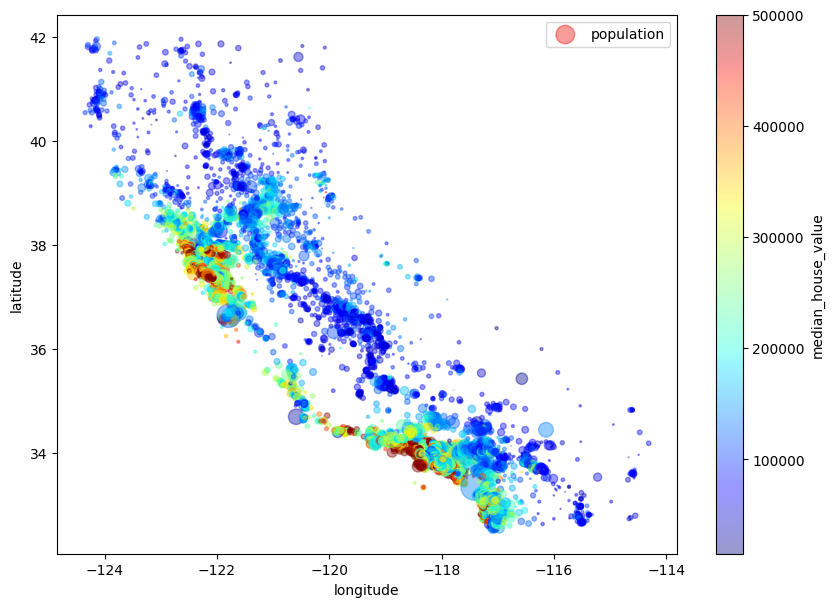

In [9]:
# option s: radius of each circle represent the population/100
# option c: color represents the median price
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, 
    s=df['population']/100, label='population', figsize=(10,7), 
    c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)

In [10]:
max_target=df['median_house_value'].max()
print("The largest median value:",max_target)
print("The # of values, equal to the largest:", sum(df['median_house_value']==max_target))
print("The % of values, equal to the largest:", sum(df['median_house_value']==max_target)/df['median_house_value'].shape[0])

The largest median value: 500001
The # of values, equal to the largest: 868
The % of values, equal to the largest: 0.04675464583894425


Almost 5% of all values = exactly 500 001. It proves our clipping theory.

This map shows the cluser of house rates and population. It is obvious from the graph that some areas are densly populated and there are clusters to high, medium and low price houses.

Thus we are including the 4 clusters in our dataframe and we name it 0,1,2,3. 

In [11]:

# plt.figure(figsize=(10,6))
# sns.stripplot(data=df,x='cluster',y='median_house_value',jitter=0.3)

In [12]:
# plt.figure(figsize=(10,6))
# sns.boxplot(data=df,x='cluster',y='median_house_value',palette='viridis')
# plt.plot()

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

lin = LinearRegression()

# we will train our model based on all numerical non-target features with not NaN total_bedrooms
appropriate_columns = df.drop(['median_house_value'],axis=1)
train_data=appropriate_columns[~pd.isnull(df).any(axis=1)]

# model will be validated on 25% of train dataset 
# theoretically we can use even our test_df dataset (as we don't use target) for this task, but we will not
temp_train, temp_valid = train_test_split(train_data,shuffle = True, test_size = 0.25, random_state=42)

lin.fit(temp_train.drop(['total_bedrooms'],axis=1), temp_train['total_bedrooms'])
np.sqrt(mean_squared_error(lin.predict(temp_valid.drop(['total_bedrooms'],axis=1)),
                           temp_valid['total_bedrooms']))
lin.fit(train_data.drop(['total_bedrooms'],axis=1), train_data['total_bedrooms'])

df['total_bedrooms_is_nan']=pd.isnull(df).any(axis=1).astype(int)
#test_df['total_bedrooms_is_nan']=pd.isnull(test_df).any(axis=1).astype(int)

df['total_bedrooms'].loc[pd.isnull(df).any(axis=1)]=\
lin.predict(df.drop(['median_house_value','total_bedrooms','total_bedrooms_is_nan'],axis=1)[pd.isnull(df).any(axis=1)])

# test_df['total_bedrooms'].loc[pd.isnull(test_df).any(axis=1)]=\
# lin.predict(test_df.drop(['median_house_value','median_house_value_log','total_bedrooms','total_bedrooms_log',
#                'ocean_proximity','total_bedrooms_is_nan'],axis=1)[pd.isnull(test_df).any(axis=1)])

#linear regression can lead to negative predictions, let's change it
# test_df['total_bedrooms']=test_df['total_bedrooms'].apply(lambda x: max(x,0))
df['total_bedrooms']=df['total_bedrooms'].apply(lambda x: max(x,0))

C:\Users\Max\AppData\Local\Temp\ipykernel_22380\2289450546.py:23: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['total_bedrooms'].loc[pd.isnull(df).any(axis=1)]=\
C:\Users\Max\AppData\Local\Temp\ipykernel_22380\2289450546.py:23: SettingWi

In [14]:
#Perform the calculations
df['rooms_per_household'] = (df['total_rooms'] / df['households'])
df['bedrooms_per_room'] = (df['total_bedrooms'] / df['total_rooms'])
df['population_per_household'] = (df['population'] / df['households'])
df['population_per_room'] = (df['population'] / df['total_rooms'])
df['population_per_bedrooms'] = (df['population'] / df['total_bedrooms'])
df['income_per_household'] = (df['median_income'] / df['households'])
df['income_per_person'] = (df['median_income'] / df['population'])
df['income_per_bedrooms'] = (df['median_income'] / df['total_bedrooms'])
df.replace([np.inf, -np.inf], np.nan, inplace=True)


In [15]:
# Correctly drop rows with any NaN values
df = df.dropna()

In [16]:
#Selecmedian_house_valuet the target variable
Y=df['median_house_value']
print('Shape of target:', Y.shape)

Shape of target: (18564,)


In [17]:
#Select all columns (except MEDV) as input features set
X = df.drop(['median_house_value'], axis=1)
print('Shape of input feature:',X.shape)
#Preprocessing is done
X = preprocessing.scale(X)

Shape of input feature: (18564, 27)


In [18]:
#The actual data is splited into test and train datasets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=11)

# MLPRegressor

In [19]:
#The MLP algorithm with some hyperparameters
model_MPL = MLPRegressor(hidden_layer_sizes=[50,50],activation='relu',alpha=0.001,
                   learning_rate ='constant', max_iter=1000,random_state=11)
#Model is trained on training dataset
model_MPL.fit(X_train,y_train)

C:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(alpha=0.001, hidden_layer_sizes=[50, 50], max_iter=1000,
             random_state=11)

In [20]:
#Predictions are done on input test and train
y_predtest = model_MPL.predict(X_test)
y_predtrain = model_MPL.predict(X_train)

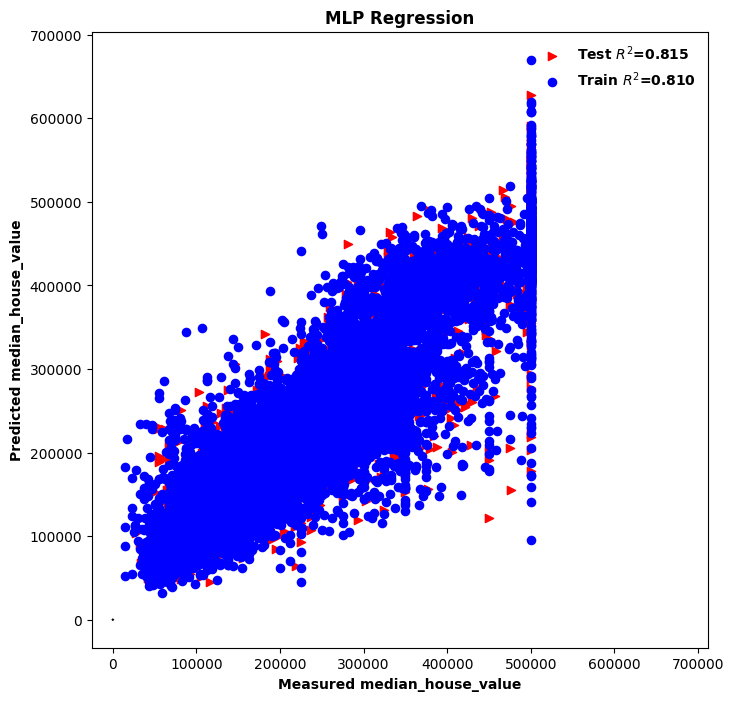

In [21]:
#A scatter plot with a metric r_square
plt.figure(figsize = (8,8))
plt.plot([0,60],[0,60],color='black')
plt.scatter(y_test,y_predtest , s=35, color='red',marker='>',label='Test $R^{2}$=''%.3f'%r2_score(y_test,y_predtest),alpha=1)
plt.scatter(y_train, y_predtrain,    s=35, color='blue',marker='o',label='Train $R^{2}$=''%.3f'%r2_score(y_train,y_predtrain),alpha=1 )

plt.xlim(0,60)
plt.ylim(0,60)
plt.legend(frameon=False,prop={'weight':'bold'})
plt.xlabel('Measured median_house_value',fontweight='bold')
plt.ylabel('Predicted median_house_value',fontweight='bold')
plt.title('MLP Regression',fontweight='bold')
plt.axis('square')

#plt.savefig('MLP_1.pdf', dpi=5000)  # Save the plot in pdf
plt.show()

In [22]:
#Some important metrics for our trained model for train and test set
print('parameter for train')
print('mean_squared_error:', mean_squared_error(y_train,y_predtrain))
print('mean_absolute_error:',mean_absolute_error(y_train,y_predtrain))
print('root mean squared error:', sqrt(mean_squared_error(y_train,y_predtrain)))
print('MPAE:',np.mean(np.abs((y_train - y_predtrain) / y_train)) * 100)
print('\nR2 value_train:',r2_score(y_train,y_predtrain))

print('\nparameter for testing')
print('mean_squared_error:', mean_squared_error(y_test,y_predtest))
print('mean_absolute_error:',mean_absolute_error(y_test,y_predtest))
print('root mean squared error:', sqrt(mean_squared_error(y_test,y_predtest)))
print('MPAE:',np.mean(np.abs((y_test - y_predtest) / y_test)) * 100)
print('\nR2 value_test:',r2_score(y_test,y_predtest))
MLPRegressor = ('MLPRegressor', r2_score(y_test,y_predtest), sqrt(mean_squared_error(y_test,y_predtest)))

parameter for train
mean_squared_error: 2531866902.7780356
mean_absolute_error: 36176.50224025008
root mean squared error: 50317.65994934617
MPAE: 21.16211838387571

R2 value_train: 0.810247154423909

parameter for testing
mean_squared_error: 2449496654.3248315
mean_absolute_error: 35362.06200998511
root mean squared error: 49492.38986273376
MPAE: 20.307220681230426

R2 value_test: 0.8153462414665983


# SVM_regression

In [23]:
from sklearn.svm import SVR  # support vector regression library
from sklearn.linear_model import LinearRegression


from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score  #some important library for evaluation 
from statistics import mean                     # taking the average
from math import sqrt                          # for square root

from scipy.stats import norm, skew             # normal distribution
from scipy import stats                       # statistical work
from matplotlib import rc

In [24]:
sv_reg = SVR(kernel ='linear',C=200,gamma=0.001,verbose = True,epsilon=0.01)  # regression model is defined here
sv_reg.fit(X_train, y_train)                                                  # fit the model

[LibSVM]

SVR(C=200, epsilon=0.01, gamma=0.001, kernel='linear', verbose=True)

In [25]:
 # prediction is done on X_test, X_train
y_predtest=sv_reg.predict(X_test)       
y_predtrain=sv_reg.predict(X_train)

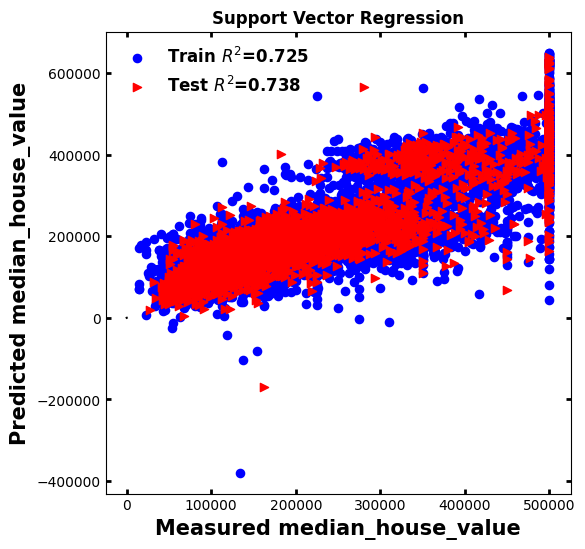

In [26]:
# visvualized by help of mathplotlib library

plt.figure(figsize=(6,6))
plt.plot([-10,50],[-10,50],color='black')

plt.scatter(y_train, y_predtrain, s=35, color='blue',marker='o',label='Train $R^{2}$=''%.3f'%r2_score(y_train,y_predtrain),alpha=1 )

plt.scatter(y_test,y_predtest , s=35, color='red',marker='>',label='Test $R^{2}$=''%.3f'%r2_score(y_test,y_predtest),alpha=1)

#plt.xlim(0,50)
#plt.ylim(0,50)
plt.legend(frameon=False,prop={'weight':'bold',"size":12})

plt.xlabel('Measured median_house_value',fontweight='bold', fontsize=15)
plt.ylabel('Predicted median_house_value',fontweight='bold', fontsize=15)
plt.title('Support Vector Regression',fontweight='bold')

#plt.axis('square')

plt.rcParams['axes.linewidth'] = 2

plt.tick_params(axis="x", direction="in",width=2)
plt.tick_params(axis="y", direction="in", width=2)

rc('font', weight='bold')

plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)

#plt.savefig('SVR.pdf', dpi=5000)   # To save the plot in pdf/jpg/png format

plt.show()

In [27]:
#some important metric for evaluate the results for train and test set respectively.

print('parameter for train')
print('mean_squared_error:', mean_squared_error(y_train,y_predtrain))
print('mean_absolute_error:',mean_squared_error(y_train,y_predtrain))
print('root mean squared error:', sqrt(mean_squared_error(y_train,y_predtrain)))
print('MPAE:',np.mean(np.abs((y_train - y_predtrain) / y_train)) * 100)
print('\nR2 value_train:',r2_score(y_train,y_predtrain))
#for test set

print('parameter for testing')
print('mean_squared_error:', mean_squared_error(y_test,y_predtest))
print('mean_absolute_error:',mean_absolute_error(y_test,y_predtest))
print('root mean squared error:', sqrt(mean_squared_error(y_test,y_predtest)))
print('MPAE:',np.mean(np.abs((y_test - y_predtest) / y_test)) * 100)
print('\nR2 value_train:',r2_score(y_test,y_predtest))
SVM_regression = ('SVM_regression', r2_score(y_test,y_predtest), sqrt(mean_squared_error(y_test,y_predtest)))

parameter for train
mean_squared_error: 3663512675.8223214
mean_absolute_error: 3663512675.8223214
root mean squared error: 60526.95825681579
MPAE: 24.04672500400837

R2 value_train: 0.7254350320395542
parameter for testing
mean_squared_error: 3476452046.8188586
mean_absolute_error: 41592.67833864342
root mean squared error: 58961.4454268114
MPAE: 22.59832952938723

R2 value_train: 0.7379298576820545


# LinearRegression

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
y_predtest=model.predict(X_test)       
y_predtrain=model.predict(X_train)

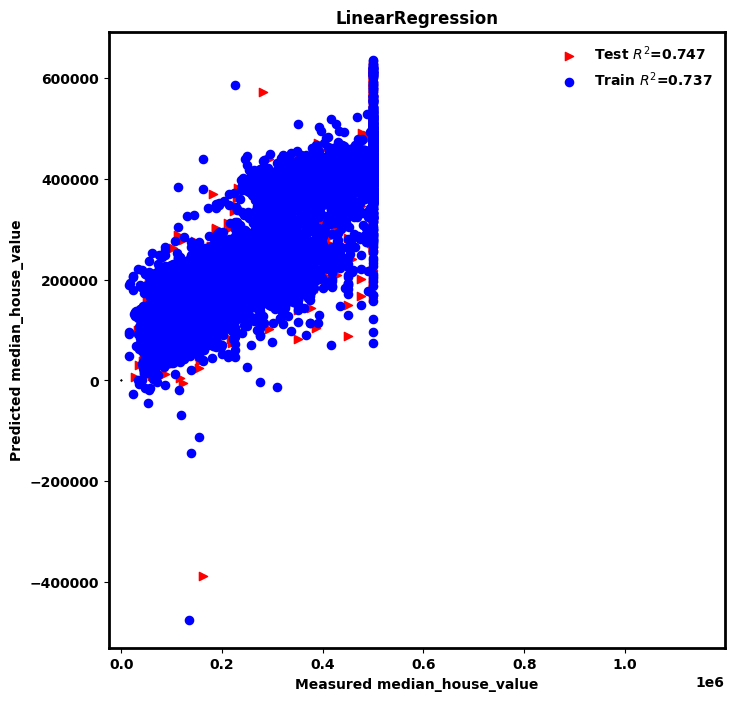

In [30]:
#A scatter plot with a metric r_square
plt.figure(figsize = (8,8))
plt.plot([0,60],[0,60],color='black')
plt.scatter(y_test,y_predtest , s=35, color='red',marker='>',label='Test $R^{2}$=''%.3f'%r2_score(y_test,y_predtest),alpha=1)
plt.scatter(y_train, y_predtrain,    s=35, color='blue',marker='o',label='Train $R^{2}$=''%.3f'%r2_score(y_train,y_predtrain),alpha=1 )

plt.xlim(0,60)
plt.ylim(0,60)
plt.legend(frameon=False,prop={'weight':'bold'})
plt.xlabel('Measured median_house_value',fontweight='bold')
plt.ylabel('Predicted median_house_value',fontweight='bold')
plt.title('LinearRegression',fontweight='bold')
plt.axis('square')

#plt.savefig('MLP_1.pdf', dpi=5000)  # Save the plot in pdf
plt.show()

In [31]:
#Some important metrics for our trained model for train and test set
print('parameter for train')
print('mean_squared_error:', mean_squared_error(y_train,y_predtrain))
print('mean_absolute_error:',mean_absolute_error(y_train,y_predtrain))
print('root mean squared error:', sqrt(mean_squared_error(y_train,y_predtrain)))
print('MPAE:',np.mean(np.abs((y_train - y_predtrain) / y_train)) * 100)
print('\nR2 value_train:',r2_score(y_train,y_predtrain))

print('\nparameter for testing')
print('mean_squared_error:', mean_squared_error(y_test,y_predtest))
print('mean_absolute_error:',mean_absolute_error(y_test,y_predtest))
print('root mean squared error:', sqrt(mean_squared_error(y_test,y_predtest)))
print('MPAE:',np.mean(np.abs((y_test - y_predtest) / y_test)) * 100)
print('\nR2 value_test:',r2_score(y_test,y_predtest))
LinearRegression = ('Linear Regression', r2_score(y_test,y_predtest), sqrt(mean_squared_error(y_test,y_predtest)))

parameter for train
mean_squared_error: 3504211954.737515
mean_absolute_error: 43623.95151050362
root mean squared error: 59196.384642455276
MPAE: 26.395506396105045

R2 value_train: 0.7373739554857268

parameter for testing
mean_squared_error: 3350250827.4316087
mean_absolute_error: 42065.226304487645
root mean squared error: 57881.35129237748
MPAE: 24.728680757620683

R2 value_test: 0.747443456914864


# DecisionTreeRegressor

In [32]:
from sklearn.tree import DecisionTreeRegressor

In [33]:
model_DT = DecisionTreeRegressor(max_depth=10, max_leaf_nodes=None, min_samples_leaf=4, min_samples_split=2)

In [34]:
model_DT.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=4)

In [35]:
y_predtest=model_DT.predict(X_test)       
y_predtrain=model_DT.predict(X_train)

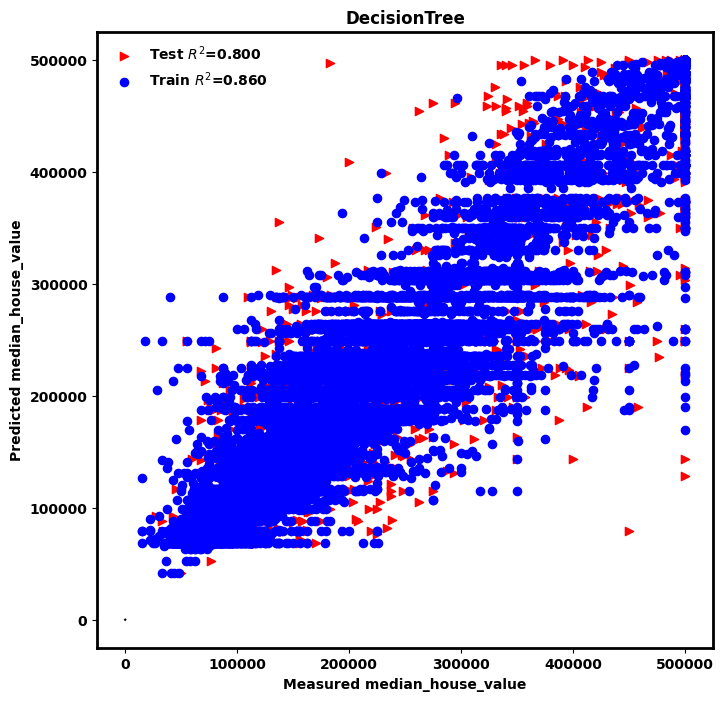

In [36]:
#A scatter plot with a metric r_square
plt.figure(figsize = (8,8))
plt.plot([0,60],[0,60],color='black')
plt.scatter(y_test,y_predtest , s=35, color='red',marker='>',label='Test $R^{2}$=''%.3f'%r2_score(y_test,y_predtest),alpha=1)
plt.scatter(y_train, y_predtrain,    s=35, color='blue',marker='o',label='Train $R^{2}$=''%.3f'%r2_score(y_train,y_predtrain),alpha=1 )

plt.xlim(0,60)
plt.ylim(0,60)
plt.legend(frameon=False,prop={'weight':'bold'})
plt.xlabel('Measured median_house_value',fontweight='bold')
plt.ylabel('Predicted median_house_value',fontweight='bold')
plt.title('DecisionTree',fontweight='bold')
plt.axis('square')

#plt.savefig('MLP_1.pdf', dpi=5000)  # Save the plot in pdf
plt.show()

In [37]:
#Some important metrics for our trained model for train and test set
print('parameter for train')
print('mean_squared_error:', mean_squared_error(y_train,y_predtrain))
print('mean_absolute_error:',mean_absolute_error(y_train,y_predtrain))
print('root mean squared error:', sqrt(mean_squared_error(y_train,y_predtrain)))
print('MPAE:',np.mean(np.abs((y_train - y_predtrain) / y_train)) * 100)
print('\nR2 value_train:',r2_score(y_train,y_predtrain))

print('\nparameter for testing')
print('mean_squared_error:', mean_squared_error(y_test,y_predtest))
print('mean_absolute_error:',mean_absolute_error(y_test,y_predtest))
print('root mean squared error:', sqrt(mean_squared_error(y_test,y_predtest)))
print('MPAE:',np.mean(np.abs((y_test - y_predtest) / y_test)) * 100)
print('\nR2 value_test:',r2_score(y_test,y_predtest))
Decisiontree = ('Decision Tree', r2_score(y_test,y_predtest), sqrt(mean_squared_error(y_test,y_predtest)))

parameter for train
mean_squared_error: 1866429419.41923
mean_absolute_error: 29915.84885363549
root mean squared error: 43202.192298762224
MPAE: 17.666471769309066

R2 value_train: 0.860118913433745

parameter for testing
mean_squared_error: 2647460337.941305
mean_absolute_error: 35497.41736436592
root mean squared error: 51453.477413497574
MPAE: 20.266437979026488

R2 value_test: 0.8004228741828103


# Randomforest

In [38]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [39]:
model_RF = RandomForestRegressor(max_depth=20, min_samples_split=5, n_estimators=500,
                      oob_score=True, random_state=42, warm_start=True)
model_RF.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, min_samples_split=5, n_estimators=500,
                      oob_score=True, random_state=42, warm_start=True)

In [40]:
#Predictions are done on input test and train
y_predtest = model_RF.predict(X_test)
y_predtrain = model_RF.predict(X_train)

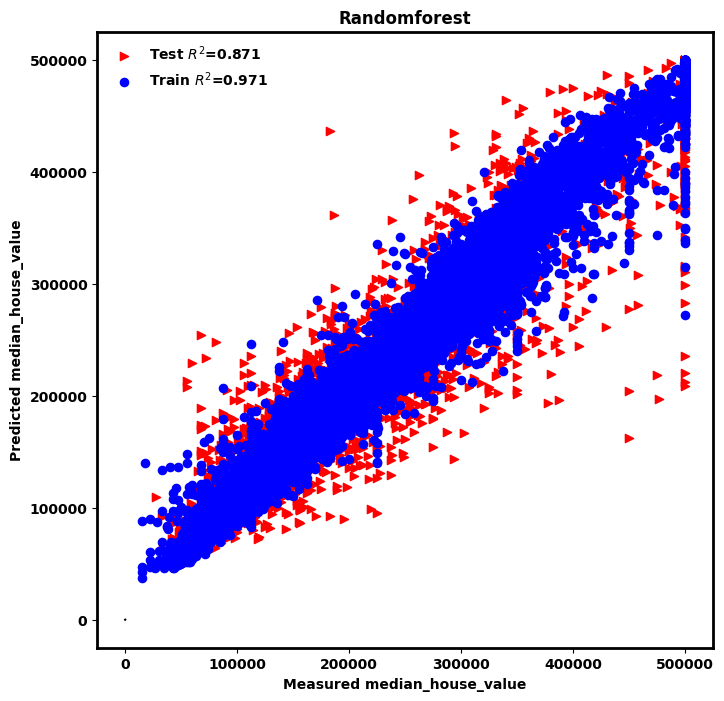

In [41]:
#A scatter plot with a metric r_square
plt.figure(figsize = (8,8))
plt.plot([0,60],[0,60],color='black')
plt.scatter(y_test,y_predtest , s=35, color='red',marker='>',label='Test $R^{2}$=''%.3f'%r2_score(y_test,y_predtest),alpha=1)
plt.scatter(y_train, y_predtrain,    s=35, color='blue',marker='o',label='Train $R^{2}$=''%.3f'%r2_score(y_train,y_predtrain),alpha=1 )

plt.xlim(0,60)
plt.ylim(0,60)
plt.legend(frameon=False,prop={'weight':'bold'})
plt.xlabel('Measured median_house_value',fontweight='bold')
plt.ylabel('Predicted median_house_value',fontweight='bold')
plt.title('Randomforest',fontweight='bold')
plt.axis('square')

#plt.savefig('MLP_1.pdf', dpi=5000)  # Save the plot in pdf
plt.show()

In [42]:
#Some important metrics for our trained model for train and test set
print('parameter for train')
print('mean_squared_error:', mean_squared_error(y_train,y_predtrain))
print('mean_absolute_error:',mean_absolute_error(y_train,y_predtrain))
print('root mean squared error:', sqrt(mean_squared_error(y_train,y_predtrain)))
print('MPAE:',np.mean(np.abs((y_train - y_predtrain) / y_train)) * 100)
print('\nR2 value_train:',r2_score(y_train,y_predtrain))

print('\nparameter for testing')
print('mean_squared_error:', mean_squared_error(y_test,y_predtest))
print('mean_absolute_error:',mean_absolute_error(y_test,y_predtest))
print('root mean squared error:', sqrt(mean_squared_error(y_test,y_predtest)))
print('MPAE:',np.mean(np.abs((y_test - y_predtest) / y_test)) * 100)
print('\nR2 value_test:',r2_score(y_test,y_predtest))
Randomforest = ('Random Forest', r2_score(y_test,y_predtest), sqrt(mean_squared_error(y_test,y_predtest)))

parameter for train
mean_squared_error: 391133894.3279101
mean_absolute_error: 13228.478414575084
root mean squared error: 19777.10530709462
MPAE: 7.6771756324119975

R2 value_train: 0.9706861488775164

parameter for testing
mean_squared_error: 1712181708.8561869
mean_absolute_error: 27851.61389266613
root mean squared error: 41378.517480163384
MPAE: 15.734900404327403

R2 value_test: 0.8709282630477474


# XGBoost

In [45]:
from xgboost import XGBRegressor
#XGB.set_config(verbosity=2)
model_XGB = XGBRegressor(n_estimators=900, max_depth=8, eta=0.03, subsample=0.8, colsample_bytree=0.7)

model_XGB.fit(X_train, y_train)

# Making predictions
y_predtest = model_XGB.predict(X_test)
y_predtrain = model_XGB.predict(X_train)


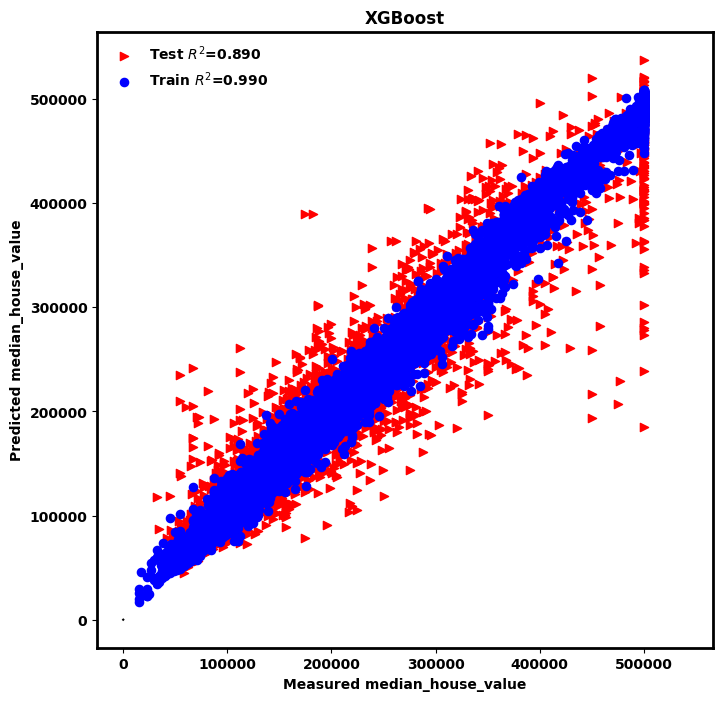

In [46]:
#A scatter plot with a metric r_square
plt.figure(figsize = (8,8))
plt.plot([0,60],[0,60],color='black')
plt.scatter(y_test,y_predtest , s=35, color='red',marker='>',label='Test $R^{2}$=''%.3f'%r2_score(y_test,y_predtest),alpha=1)
plt.scatter(y_train, y_predtrain,    s=35, color='blue',marker='o',label='Train $R^{2}$=''%.3f'%r2_score(y_train,y_predtrain),alpha=1 )

plt.xlim(0,60)
plt.ylim(0,60)
plt.legend(frameon=False,prop={'weight':'bold'})
plt.xlabel('Measured median_house_value',fontweight='bold')
plt.ylabel('Predicted median_house_value',fontweight='bold')
plt.title('XGBoost',fontweight='bold')
plt.axis('square')

#plt.savefig('MLP_1.pdf', dpi=5000)  # Save the plot in pdf
plt.show()

In [47]:
#Some important metrics for our trained model for train and test set
print('parameter for train')
print('mean_squared_error:', mean_squared_error(y_train,y_predtrain))
print('mean_absolute_error:',mean_absolute_error(y_train,y_predtrain))
print('root mean squared error:', sqrt(mean_squared_error(y_train,y_predtrain)))
print('MPAE:',np.mean(np.abs((y_train - y_predtrain) / y_train)) * 100)
print('\nR2 value_train:',r2_score(y_train,y_predtrain))

print('\nparameter for testing')
print('mean_squared_error:', mean_squared_error(y_test,y_predtest))
print('mean_absolute_error:',mean_absolute_error(y_test,y_predtest))
print('root mean squared error:', sqrt(mean_squared_error(y_test,y_predtest)))
print('MPAE:',np.mean(np.abs((y_test - y_predtest) / y_test)) * 100)
print('\nR2 value_test:',r2_score(y_test,y_predtest))

XGBoost = ('XGBoost', r2_score(y_test,y_predtest), sqrt(mean_squared_error(y_test,y_predtest)))

parameter for train
mean_squared_error: 136604356.21691135
mean_absolute_error: 8499.329014170973
root mean squared error: 11687.786626085854
MPAE: 5.120533080934631

R2 value_train: 0.9897620742694619

parameter for testing
mean_squared_error: 1465032793.4257987
mean_absolute_error: 25498.461843312347
root mean squared error: 38275.74680428585
MPAE: 14.195698192896645

R2 value_test: 0.8895594279734469


# Gradient Boosting Regressor

In [48]:
model_GB = GradientBoostingRegressor(max_depth=8, max_features=7, min_samples_split=200, n_estimators=600)
# Training the XGBoost model
model_GB.fit(X_train, y_train)

# Making predictions
y_predtest = model_GB.predict(X_test)
y_predtrain = model_GB.predict(X_train)

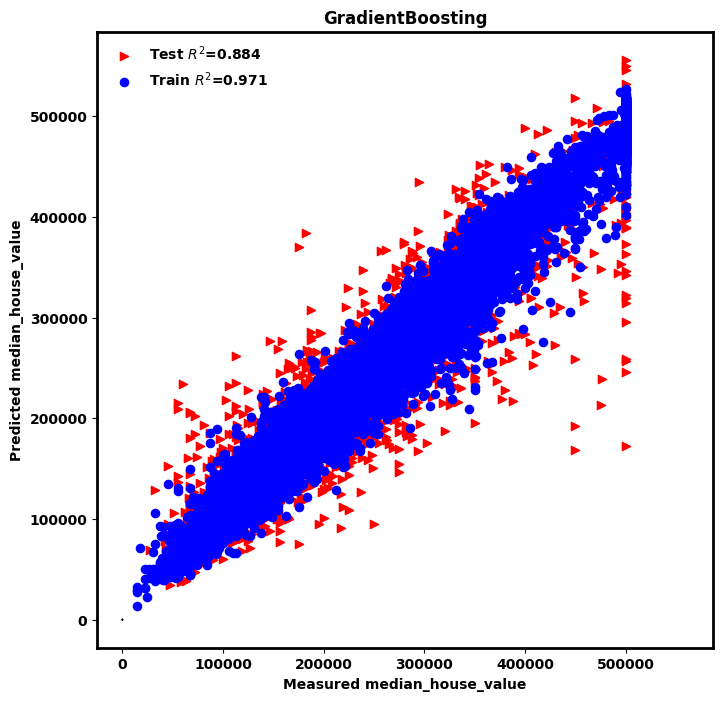

In [49]:
#A scatter plot with a metric r_square
plt.figure(figsize = (8,8))
plt.plot([0,60],[0,60],color='black')
plt.scatter(y_test,y_predtest , s=35, color='red',marker='>',label='Test $R^{2}$=''%.3f'%r2_score(y_test,y_predtest),alpha=1)
plt.scatter(y_train, y_predtrain,    s=35, color='blue',marker='o',label='Train $R^{2}$=''%.3f'%r2_score(y_train,y_predtrain),alpha=1 )

plt.xlim(0,60)
plt.ylim(0,60)
plt.legend(frameon=False,prop={'weight':'bold'})
plt.xlabel('Measured median_house_value',fontweight='bold')
plt.ylabel('Predicted median_house_value',fontweight='bold')
plt.title('GradientBoosting',fontweight='bold')
plt.axis('square')

#plt.savefig('MLP_1.pdf', dpi=5000)  # Save the plot in pdf
plt.show()

In [50]:
#Some important metrics for our trained model for train and test set
print('parameter for train')
print('mean_squared_error:', mean_squared_error(y_train,y_predtrain))
print('mean_absolute_error:',mean_absolute_error(y_train,y_predtrain))
print('root mean squared error:', sqrt(mean_squared_error(y_train,y_predtrain)))
print('MPAE:',np.mean(np.abs((y_train - y_predtrain) / y_train)) * 100)
print('\nR2 value_train:',r2_score(y_train,y_predtrain))

print('\nparameter for testing')
print('mean_squared_error:', mean_squared_error(y_test,y_predtest))
print('mean_absolute_error:',mean_absolute_error(y_test,y_predtest))
print('root mean squared error:', sqrt(mean_squared_error(y_test,y_predtest)))
print('MPAE:',np.mean(np.abs((y_test - y_predtest) / y_test)) * 100)
print('\nR2 value_test:',r2_score(y_test,y_predtest))

GradientBoosting = ('GradientBoosting', r2_score(y_test,y_predtest), sqrt(mean_squared_error(y_test,y_predtest)))

parameter for train
mean_squared_error: 388863426.80977917
mean_absolute_error: 14344.260126363975
root mean squared error: 19719.620351563037
MPAE: 8.275169726032388

R2 value_train: 0.9708563109314067

parameter for testing
mean_squared_error: 1534055709.831986
mean_absolute_error: 26379.905021078186
root mean squared error: 39167.02324445893
MPAE: 14.851771080859589

R2 value_test: 0.8843561790052002


In [51]:
df_results = pd.DataFrame([XGBoost, MLPRegressor, LinearRegression, Decisiontree, Randomforest, SVM_regression, GradientBoosting], columns=['model', 'R2','RMSE'])
df_results.sort_values('R2',ascending=False)

,model,R2,RMSE
0,XGBoost,0.889559,38275.746804
6,GradientBoosting,0.884356,39167.023244
4,Random Forest,0.870928,41378.517480
1,MLPRegressor,0.815346,49492.389863
3,Decision Tree,0.800423,51453.477413
2,Linear Regression,0.747443,57881.351292
5,SVM_regression,0.737930,58961.445427
